# Model Perfomance Metrics

- Supervised Learning
    - Regression Models
        - Coefficient of Determination or R-squared
        - Residual Sum of Squares (RSS)
        - Mean Squared Error (MSE)
        - Mean Absolute Error (MAE)
        - Median Absolute Error / Median Absolute Deviation (MAD)
        - Root mean squared error (RMSE)
        - Explained variance score

    - Classification Models
        - Accuracy
        - Model Complexity Curve
        - Precision
        - Recall
        - F1 Score
        - ROC Curve
        - Precision-recall Curve
        - AUC
        - Log Loss


- Unsupervised Learning
    - Inertia ("elbow" rule)
    - Cross-tabulation

Once we've built a model, it's important to understand how well it works. To do so, we evaluate the model against one or more metrics.

## Model Complexity Curve

In this exercise, you will compute and plot the training and testing accuracy scores (**model complexity curve**) for a variety of different neighbor values. By observing how the accuracy scores differ for the training and testing sets with different values of k, you will develop your intuition for **overfitting** and **underfitting**.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

path = 'data/dc18/'

In [14]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Import necessary modules
from sklearn import datasets

# Load the digits dataset: digits
digits = datasets.load_digits()

# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.9833333333333333


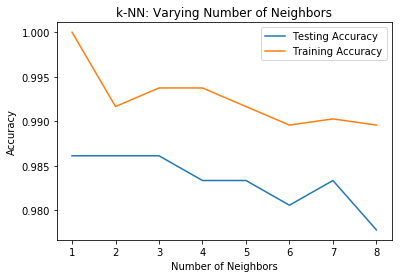

In [15]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

## Regression Models

In [16]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [17]:
np.random.seed(42)

# Np.newaxis comes in very handy when you want to explicitly convert an 1D array 
# to either a row vector or a column vector.

X = (np.array(sorted(list(range(5))*20)) 
     + np.random.normal(size=100, scale=0.5))[:, np.newaxis]

y = (np.array(sorted(list(range(5))*20)) 
     + np.random.normal(size=100, scale=0.25))[:, np.newaxis]

In [18]:
X[0:10]

array([[ 0.24835708],
       [-0.06913215],
       [ 0.32384427],
       [ 0.76151493],
       [-0.11707669],
       [-0.11706848],
       [ 0.78960641],
       [ 0.38371736],
       [-0.23473719],
       [ 0.27128002]])

In [19]:
y[0:10]

array([[-0.35384269],
       [-0.10516133],
       [-0.08567863],
       [-0.20056932],
       [-0.04032143],
       [ 0.10101271],
       [ 0.47154648],
       [ 0.04364445],
       [ 0.0643876 ],
       [-0.01861148]])

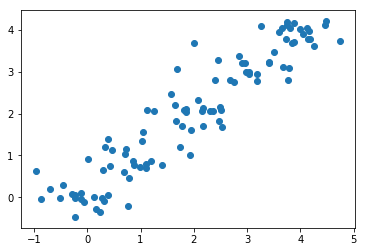

In [20]:
plt.scatter(X,y);

In [21]:
clf = LinearRegression()
clf.fit(X, y)
y_pred = clf.predict(y)

### R2 (R-squared) - Coefficient of Determination

The first and most immediately useful metric to use in regression is the **R-squared**, also known as the **coefficient of determination**. 

<img src="images/metric_rsquared.png" alt="" style="width: 800px;"/>

From: [Model Fit Metrics](https://www.kaggle.com/residentmario/model-fit-metrics/)

The **coefficient of determination** is a measure of how well future samples will be predicted by the model. `The best possible score is 1. A constant model which always predicts the average will recieve a score of 0.` A model which is arbitrarily worse than an averaging model will recieve a negative score (this shouldn't happen in practice obviously!).

In practice, it is a "best default" model score: other metrics may be better to use, depending on what you are optimizing for, but the  R2  is just generally very good, and should be the first number you look at in most cases.

R2 is such a popular metric that there are artificial R2 scores, designed to work in a similar way but with completely different underlying mathematics, which are defined for other non-regression operations.

In [22]:
def r2_score(y, y_pred):
    n = len(y)
    y_avg = (1 / n) * np.sum(y) # y bar
    pred_error = np.sum((y - y_pred)**2)
    avg_error = np.sum((y - y_avg)**2)
    return 1 - pred_error / avg_error

r2_score(y, y_pred)

0.9846558399170495

In [23]:
from sklearn.metrics import r2_score
r2_score(y, y_pred)

0.9846558399170495

### Residual Sum of Squares (RSS)

The **residual sum of squares** is the top term in the  R2  metric (albeit adjusted by 1 to account for degrees of freedom). It takes the distance between observed and predicted values (the **residuals**), squares them, and sums them all together. Ordinary least squares regression is designed to minimize exactly this value.

<img src="images/metric_rss.png" alt="" style="width: 800px;"/>

From: [Model Fit Metrics](https://www.kaggle.com/residentmario/model-fit-metrics/)

RSS is not very interpretable on its own, because it is the sum of many (potentially very large) residuals. For this reason it is rarely used as a metric, but because it is so important to regression, it's often included in statistical fit assays.

In [24]:
def rss_score(y, y_pred):
    return np.sum((y - y_pred)**2)

rss_score(y, y_pred)

3.147418578949139

### Mean Squared Error (MSE)

**Mean squared error** is the interpretable version of RSS. MSE divides RSS (again adjusted be 1, to account for degrees of freedom) by the number of samples in the dataset to arrive at the average amount of squared error in the model:

<img src="images/metric_mse.png" alt="" style="width: 800px;"/>

From: [Model Fit Metrics](https://www.kaggle.com/residentmario/model-fit-metrics/)

This is easily interpretable, because it makes a lot of intrinsic sense. Ordinary least squares regression asks that we minimize quadratic error; MSE measures, on average, how much such error is left in the model. However, due to the squaring involved, it is not very robust against outliers.

In [25]:
def mean_squared_error(y, y_pred):
    return (1 / len(y)) * np.sum((y - y_pred)**2)

mean_squared_error(y, y_pred)

0.03147418578949139

In [26]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, y_pred)

0.03147418578949139

### Mean Absolute Error (MAE)

**Mean absolute error** computes the expected absolute error (or L1-norm loss). Because it involves means, not squared residuals, mean absolute error is more resistant to outliers than MSE is.

<img src="images/metric_mae.png" alt="" style="width: 800px;"/>

From: [Model Fit Metrics](https://www.kaggle.com/residentmario/model-fit-metrics/)

In [27]:
def mean_absolute_error(y, y_pred):
    return (1 / len(y)) * np.sum(np.abs(y - y_pred))
    
mean_absolute_error(y, y_pred)

0.15371923162949003

In [28]:
from sklearn.metrics import mean_absolute_error   
mean_absolute_error(y, y_pred)

0.15371923162949003

### Median Absolute Error / Median Absolute Deviation (MAD)

**Median absolute error** is the most resistant metric to outliers that's possible using simple methods.

<img src="images/metric_mad.png" alt="" style="width: 800px;"/>

From: [Model Fit Metrics](https://www.kaggle.com/residentmario/model-fit-metrics/)

In [29]:
def median_absolute_error(y, y_pred):
    return np.median(np.abs(y - y_pred))
    
mean_absolute_error(y, y_pred)

0.15371923162949003

In [30]:
from sklearn.metrics import median_absolute_error
median_absolute_error(y, y_pred)

0.15514813323997423

### Root mean squared error (RMSE)

**Root mean squared error** is an error metric that's popular in the literature. It is defined as the square root of mean squared error:

<img src="images/metric_rmse.png" alt="" style="width: 800px;"/>

From: [Model Fit Metrics](https://www.kaggle.com/residentmario/model-fit-metrics/)

`RMSE is directly comparable to, and serves a similar role as, the MAE, mean absolute error`.

The computational effect is that RMSE is less resistant to outliers, and thus reports a poorer-fitting model when outliers are not properly accounted for. This is considered a good thing when doing cetain things, like performing hyperparameter searches. However, `MAE is a more useful reporting statistic because MAE is interpretable, while RMSE is not`.

In [31]:
def root_mean_squared_error(y, y_pred):
    return np.sqrt((1 / len(y)) * np.sum((y - y_pred)**2))

root_mean_squared_error(y, y_pred)

0.17740965528823788

### Explained variance score

The **explained variance score** is a very clever (IMO) metric which looks at the ratio between the variance of the model/truth differences and the variance of the ground truth alone:

<img src="images/metric_evs.png" alt="" style="width: 800px;"/>

From: [Model Fit Metrics](https://www.kaggle.com/residentmario/model-fit-metrics/)

Hence the moniker "explained variance". `The best possible score is 1 (all variance is explained)` and the score goes down from there. 

Variance explained does not actually mean that we have explained anything, at least in a causal sense. That is, it does not imply that we know what is going on. `It simply means that we can use one or more variables to predict things more accurately than before`.

In many models, if X is correlated with Y, X can be said to `“explain”` variance in Y even though X does not really cause Y. However, in some situations the term variance explained is accurate in every sense:

<img src="images/xcausesy1.png" alt="X Causes Y" style="width: 400px;"/>

From: [Two visualizations for explaining “variance explained](https://assessingpsyche.wordpress.com/2014/07/10/two-visualizations-for-explaining-variance-explained/)

In the model above, the arrow means that X really is a partial cause of Y. Why does Y vary? Because of variability in X, at least in part. In this example, 80% of Y’s variance is due to X, with the remaining variance due to something else (somewhat misleadingly termed error). It is not an “error” in that something is wrong or that someone is making a mistake. It is merely that which causes our predictions of Y to be off. `Prediction error` is probably not a single variable. It it likely to be the sum total of many influences.

Because X and error are uncorrelated z-scores in this example, the path coefficients are equal to the correlations with Y. Squaring the correlation coefficients yields the variance explained. The coefficients for X and error are actually the square roots of .8 and .2, respectively. Squaring the coefficients tells us that X explains 80% of the variance in Y and error explains the rest.

Okay, if X predicts Y, then the variance explained is equal to the correlation coefficient squared. Unfortunately, this is merely a formula. It does not help us understand what it means. Perhaps this visualization will help:

<img src="images/varianceexplained.gif" alt="Variance explained" style="width: 400px;"/>

From: [Two visualizations for explaining “variance explained](https://assessingpsyche.wordpress.com/2014/07/10/two-visualizations-for-explaining-variance-explained/)

If you need to guess every value of Y but you know nothing about Y except that it has a mean of zero, then you should guess zero every time. You’ll be wrong most of the time, but pursuing other strategies will result in even larger errors. The variance of your prediction errors will be equal to the variance of Y. In the picture above, this corresponds to a regression line that passes through the mean of Y and has a slope of zero. No matter what X is, you guess that Y is zero. The squared vertical distance from Y to the line is represented by the translucent squares. The average area of the squares is the variance of Y.

If you happen to know the value of X each time you need to guess what Y will be, then you can use a regression equation to make a better guess. Your prediction of Y is called Y-hat (Ŷ):

<img src="images/vexplained2.png" alt="Variance explained" style="width: 400px;"/>

From: [Two visualizations for explaining “variance explained](https://assessingpsyche.wordpress.com/2014/07/10/two-visualizations-for-explaining-variance-explained/)

When X and Y have the same variance, the slope of the regression line is equal to the correlation coefficient, 0.89. The distance from Ŷ (the predicted value of Y) to the actual value of Y is the prediction error. In the picture above, the variance of the prediction errors (0.2) is the average size of the squares when the slope is equal to the correlation coefficient.

Thus, when X is not used to predict Y, our prediction errors have a variance of 1. When we do use X to predict Y, the average size of the prediction errors shrinks from 1 to 0.2, an 80% reduction. This is what is meant when we say that “X explains 80% of the variance in Y.” `It is the proportion by which the variance of the prediction errors shrinks`.

In [32]:
def explained_variance_score(y, y_pred):
    return 1 - (np.var(y - y_pred) / np.var(y))

explained_variance_score(y, y_pred)

0.9859076890259523

In [33]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y, y_pred)

0.9859076890259523

## Classification Models

### Binary Classification Problem

Examplary questions:
- Is this email spam?
- Should we hire this candidate?
- Is this air traveler secretly a terrorist?

Given a set of labeled data and a predictive model, every data point lies in one of four categories:
- `True positive` - This message is spam, and we correctly predicted spam.
- `False positive (Type 1 error)` - This message is not spam, but we predicted spam.
- `False negative (Type 2 error)` - This message is spam, but we predicted otherwise.
- `True negative` - This message is not spam, and we correctly predicted not spam.

**Confusion Matrix**

<img src="images/confusion-matrix.png" alt="" style="width: 400px;"/>


In [34]:
df = pd.read_csv(path+'pima.csv', index_col=0)
df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35.00000,155.548223,33.6,0.627,50,1
1,1,85,66,29.00000,155.548223,26.6,0.351,31,0
2,8,183,64,29.15342,155.548223,23.3,0.672,32,1
3,1,89,66,23.00000,94.000000,28.1,0.167,21,0
4,0,137,40,35.00000,168.000000,43.1,2.288,33,1


In [35]:
X = np.array(df.drop('diabetes', axis=1).values)
y = np.array(df.diabetes.values)

In [36]:
# Import necessary modules
from sklearn.metrics import classification_report, confusion_matrix

# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[176  30]
 [ 52  50]]
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       206
           1       0.62      0.49      0.55       102

   micro avg       0.73      0.73      0.73       308
   macro avg       0.70      0.67      0.68       308
weighted avg       0.72      0.73      0.72       308



### Accuracy
Accuracy is the fraction of correct predictions.

In [37]:
def accuracy(tp: int, fp: int, fn: int, tn: int) -> float:
    correct = tp + tn
    total = tp + fp + fn + tn
    return correct / total

assert accuracy(70, 4930, 13930, 981070) == 0.98114

### Precision
Precision measures how accurate our positive predictions were.

In [38]:
def precision(tp: int, fp: int, fn: int, tn: int) -> float:
    return tp / (tp + fp)

assert precision(70, 4930, 13930, 981070) == 0.014

### Recall
Recall measures what fraction of the positives our model identified.

In [39]:
def recall(tp: int, fp: int, fn: int, tn: int) -> float:
    return tp / (tp + fn)

assert recall(70, 4930, 13930, 981070) == 0.005

### F1 Score
F1 Score is the harmonic mean of `precision` and `recall` and necessarily lies between them.

In [40]:
def f1_score(tp: int, fp: int, fn: int, tn: int) -> float:
    p = precision(tp, fp, fn, tn)
    r = recall(tp, fp, fn, tn)
    return 2 * p * r / (p * r)

Usually the choice of a model involves a **tradeoff between `precision` and `recall`**. A model that predicts "yes" when it's even a little bit confident will probably have a high `recall` but a low `precision` (lots of False positives). A model that predicts "yes" only when it's extremely confident is likely to have a low `recall` and a high `precision` (lots of False negatives). Choosing the right threshold is a matter of finding the right tradeoff.

In [43]:
# Predictions vs. actuals plot - see Logistic Regression for details
predictions = [logistic(dot(beta, x_i)) for x_i in X_test]

plt.figure(figsize=(10,8))
plt.scatter(predictions, y_test, marker='+')
plt.xlabel("Predicted probability")
plt.ylabel("Actual outcome")
plt.title("Logistic Regression Predicted vs. Actual")
#plt.savefig('images/logistic3.png')
plt.show();

NameError: name 'logistic' is not defined

### ROC Curve

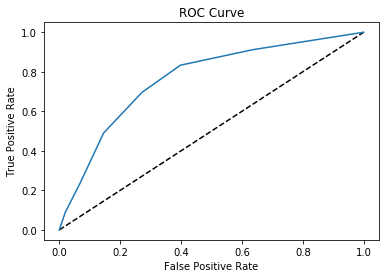

In [44]:
# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = knn.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show();

### Precision-recall Curve

When looking at your **ROC curve**, you may have noticed that the y-axis (True positive rate) is also known as **recall**. Indeed, in addition to the **ROC curve**, there are other ways to visually evaluate model performance. One such way is the **precision-recall curve**, which is generated by plotting the precision and recall for different thresholds. As a reminder, precision and recall are defined as:

<img src="images/precision-recall.png" alt="" style="width: 300px;"/>

Below, a **precision-recall curve** has been generated for the diabetes dataset.

<img src="images/precision-recall-curve.png" alt="" style="width: 400px;"/>

### AUC computation

Say you have a binary classifier that in fact is just randomly making guesses. It would be correct approximately 50% of the time, and the resulting **ROC curve** would be a diagonal line in which the `True Positive Rate` and `False Positive Rate` are always equal. The **Area under this ROC curve** would be `0.5`. This is one way in which the **AUC** is an informative metric to evaluate a model. If the **AUC** is greater than 0.5, the model is better than random guessing. Always a good sign!

In this exercise, you'll calculate **AUC** scores using the `roc_auc_score()` function from sklearn.metrics as well as by performing cross-validation on the diabetes dataset.

X and y, along with training and test sets X_train, X_test, y_train, y_test, have been pre-loaded for you, and a logistic regression classifier logreg has been fit to the training data.

In [45]:
# Import necessary modules
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score 

# Compute predicted probabilities: y_pred_prob
y_pred_prob = knn.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
# Compute the AUC scores by performing 5-fold cross-validation
cv_auc = cross_val_score(knn, X, y, cv=5, scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC: 0.7638254330858557
AUC scores computed using 5-fold cross-validation: [0.72648148 0.70962963 0.77925926 0.82669811 0.78150943]


## Log Loss

**Log loss** penalizes highly confident wrong answers much more than any other type. This will be a good metric to use on your models.

In [46]:
actual_labels = [1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
correct_confident = [0.95, 0.95, 0.95, 0.95, 0.95, 0.05, 0.05, 0.05, 0.05, 0.05]
correct_not_confident = [0.65, 0.65, 0.65, 0.65, 0.65, 0.35, 0.35, 0.35, 0.35, 0.35]
wrong_not_confident = [0.35, 0.35, 0.35, 0.35, 0.35, 0.65, 0.65, 0.65, 0.65, 0.65]
wrong_confident = [0.05, 0.05, 0.05, 0.05, 0.05, 0.95, 0.95, 0.95, 0.95, 0.95]

In [47]:
import numpy as np

def compute_log_loss(predicted, actual, eps=1e-14):
    """ Computes the logarithmic loss between predicted and
         actual when these are 1D arrays.

         :param predicted: The predicted probabilities as floats between 0-1
         :param actual: The actual binary labels. Either 0 or 1.
         :param eps (optional): log(0) is inf, so we need to offset our
         predicted values slightly by eps from 0 or 1.
     """
    predicted = np.clip(predicted, eps, 1 - eps)
    loss = -1 * np.mean(actual * np.log(predicted)
                        + (1 - actual) 
                        * np.log(1 - predicted))
    return loss

In [49]:
# Compute and print log loss for 1st case
correct_confident_loss = compute_log_loss(correct_confident, actual_labels)
print("Log loss, correct and confident: {}".format(correct_confident_loss)) 

# Compute log loss for 2nd case
correct_not_confident_loss = compute_log_loss(correct_not_confident, actual_labels)
print("Log loss, correct and not confident: {}".format(correct_not_confident_loss)) 

# Compute and print log loss for 3rd case
wrong_not_confident_loss = compute_log_loss(wrong_not_confident, actual_labels)
print("Log loss, wrong and not confident: {}".format(wrong_not_confident_loss)) 

# Compute and print log loss for 4th case
wrong_confident_loss = compute_log_loss(wrong_confident, actual_labels)
print("Log loss, wrong and confident: {}".format(wrong_confident_loss)) 

# Compute and print log loss for actual labels
actual_labels_loss = compute_log_loss(actual_labels, actual_labels)
print("Log loss, actual labels: {}".format(actual_labels_loss)) 

TypeError: unsupported operand type(s) for -: 'int' and 'list'

## Unsupervised Learning

In [50]:
points = np.array([[0.06544649120573354, -0.7686637583746054],
 [-1.5290154723631335, -0.4295307892836781],
 [1.7099337125153655, 0.698852527207745],
 [1.1677914530353883, 1.0126263823062864],
 [-1.8011008765125671, -0.3186129561722616],
 [-1.635678878103174, -0.02859534770489522],
 [1.2199037530859576, 0.7464346306206472],
 [-0.2617515511040414, -0.6249293924445927],
 [-1.6192580392899492, -0.4798394895824938],
 [-1.843295821844137, -0.16694431084935166],
 [1.3599960195356797, 0.9499582661886437],
 [0.42291856473720796, -0.7349534005968037],
 [-1.6857613901150803, 0.10686727571590626],
 [0.9062999493855556, 1.0910516186925248],
 [-1.5647832151997594, -0.8467539409172038],
 [-0.025784901040515423, -1.1867253939984086],
 [0.8302732361682478, 1.1450461198177004],
 [1.224504318044118, 1.3506675856135453],
 [-0.15394595513245585, -0.7170430090340084],
 [0.8635880949171804, 1.068246134206403],
 [-1.433863658847475, -0.2381297048308357],
 [0.03844768620526845, -0.7463502234351036],
 [-1.585679224619341, 0.08499354465579917],
 [0.6359887951357822, -0.5847769797814781],
 [0.24417242307388476, -0.5317246502745662],
 [-2.196803585261628, 0.4947367720571247],
 [1.0323502988225113, -0.5568799954803777],
 [-0.2885806653720872, -0.39972527763075705],
 [0.20597008007219075, -0.8017153577365872],
 [-1.210730799565148, -0.3492410894419737],
 [1.3342368384681809, 0.7721489008208623],
 [1.1948015178340623, 1.047885558425092],
 [0.9917476953726534, 0.8920200767628542],
 [-1.8356219039361112, -0.04839732479614648],
 [0.08415720766561488, -0.7156432575403593],
 [-1.4897017522845528, -0.19299604094122305],
 [0.3878241808139117, -0.8206011901833663],
 [-0.014480440773439684, -0.9779840987237762],
 [-2.0521340998721707, -0.02129125401311013],
 [0.10331194324225318, -0.8216278059218872],
 [-0.4418931501740598, -0.6571097360468146],
 [1.103909263225082, 1.024811819134689],
 [-1.5922775939582692, -0.17374037962574693],
 [-1.473441520416564, -0.02202853049685249],
 [-1.3551470405553263, 0.2297106712795478],
 [0.04123369958015996, -1.2377662208006797],
 [0.4761516993039864, -1.136721236563179],
 [1.043356760427954, 0.8234590470870763],
 [-0.0796188170335298, -0.8567739353621651],
 [0.8706505901795596, 1.0805284140253724],
 [1.4026731334929738, 1.0752511922343315],
 [0.8011115670043031, 1.283428254742632],
 [-0.16527515500861514, -1.2358380385590229],
 [-0.3377922091012056, -0.5919432342243465],
 [0.8061074868332878, -0.7375215868012956],
 [-1.4359003186858177, -0.5638444576816151],
 [0.5486889533068995, -0.9514382937143939],
 [0.4680313077949052, -0.7497390745187791],
 [-1.513712896942057, -0.8391432284169498],
 [0.913843599841932, 1.5112653172575654],
 [-1.972339030423432, -0.41155374962957947],
 [0.5213406016331779, -0.8865489365482295],
 [0.6275949431557073, -1.185904771196431],
 [0.9416301405581072, 1.3539933545913059],
 [0.5699476779996157, 1.07036605536564],
 [-1.8766338206265312, 0.14745773409173726],
 [0.9061218594658672, 0.9108401052814168],
 [-1.3748145362460542, 0.28428394728799217],
 [-1.8056402943668943, -0.9671057419425316],
 [0.3430775659691717, -0.7999927487937941],
 [0.7038056620973427, 1.000258041761561],
 [-1.6848986211185557, -0.3056459496643352],
 [1.3147322131175057, 0.986149780647387],
 [0.2615121623829735, -0.2606925092787008],
 [0.9193121024473212, 0.823714845526499],
 [-1.2179592899480618, -0.2021967434650836],
 [-0.1772272310977897, -1.0266524532448829],
 [0.6482486163633215, -0.6682288060013553],
 [0.412067864292622, -0.28783784420181835],
 [1.0156820171676155, 1.1348166724278068],
 [0.6790025410486296, -0.9148950199813576],
 [-1.051827471063715, -0.010623762325267516],
 [0.6130659861093055, 1.7821038376771536],
 [-1.5021974801612847, -0.5230892170854781],
 [-1.7271729328459169, -0.4617391574563362],
 [-1.6099563119906712, -0.1821007032109933],
 [-1.0911102066045015, -0.07813980218573177],
 [-0.01046978156325079, -0.8091303412886869],
 [0.32782303252220457, -0.8073475437162415],
 [1.220385032027253, 1.195979302100845],
 [-1.333286810602751, -0.3000193743679564],
 [0.8795951689645072, 1.1156649125877478],
 [-1.148290981079215, -0.30400762010005744],
 [-0.5801975462632827, -1.1999601847068089],
 [-0.011611594015490669, -0.7846885353997791],
 [0.17359724107621646, -0.6339814535829698],
 [1.3273855590403572, 0.6775996875620109],
 [-1.9346732743106585, 0.30572472057151284],
 [-1.5776189340196929, -0.2772636496588521],
 [0.4763900025188839, 1.2142264755806365],
 [-1.6523750865252471, -0.6803981003840274],
 [-0.12609976246678, -1.0432745741405829],
 [-1.8960708245432247, -0.7008550197468331],
 [0.5746689857995531, 0.748783693306254],
 [-0.1666031224121718, -0.831102946952984],
 [0.8013354959100127, 1.2224443484235474],
 [1.1845542591567533, 1.434646700177676],
 [1.0886442772018283, 0.6466711158456921],
 [-1.6115850479861942, 0.2280572487292947],
 [-1.5751220451660382, -0.09612576005083648],
 [0.0721356955324795, -0.6964032764653807],
 [-1.4005429784650547, 0.16390597510235927],
 [1.0960771260886046, 1.1680469115344367],
 [-2.5434620433141517, -0.23089821715764086],
 [-1.3454487471580343, 0.25151125700096744],
 [-1.3547862853823236, -0.1910331668559034],
 [0.1836811292599628, -1.1582772499848413],
 [-1.3136867742972251, -0.3763569984538013],
 [0.09990128656336106, 1.2250049094266122],
 [1.1722557441252894, 1.3083514263524965],
 [0.08653969877007911, -0.7971437137358454],
 [-0.21053922872177586, -1.1342151077436895],
 [0.26496023904754856, -0.9476074245480344],
 [-0.2557591033928975, -1.0626602197221122],
 [-0.2603975738337485, -0.7477422467984205],
 [-1.917873593816116, 0.16434571406389192],
 [0.9302113924561816, 0.4943633069333503],
 [0.4477046652125147, -0.7287791759929736],
 [-1.6380286912248638, -0.5892552757456395],
 [-1.9571276340863957, -0.10125137401907584],
 [0.9270337011305244, 0.882514226728072],
 [1.2566009331779366, 0.6082807304621214],
 [-1.7281863178915309, 0.08416886607685152],
 [0.3499787973638875, -0.30490298294617035],
 [-1.516960820018647, -0.5091310892535825],
 [0.18763604846446186, -0.5542492405318324],
 [0.8960980862983607, 0.8355150812307898],
 [-1.5496885650240504, -0.1711478213441832],
 [1.215745697288779, 1.233177284686227],
 [0.20307745359011034, -1.0378490610962725],
 [0.8458908629104305, 1.0361527283579377],
 [0.5323791878568742, 1.4736288387658585],
 [-0.05319044083262858, -1.361505529107807],
 [1.388197431517556, 1.117299153890155],
 [1.0069630382934158, 1.036772104404645],
 [0.5668186879625374, -1.0963717575863503],
 [0.8688829648688388, 1.0524887417163158],
 [-1.1628660935320507, -0.5587524541922939],
 [0.27717767905113744, -0.8384401498713722],
 [0.16563267253352665, -0.8030660737386272],
 [0.3826330298198334, -0.4268324141890895],
 [1.1451980736781826, 0.896590262377021],
 [0.8145585690063701, 0.6753366702240604],
 [-1.8603152008514652, -0.0953756097092091],
 [0.9656409952874998, 0.9029557901112318],
 [-1.4989745116151008, -0.3325404360102928],
 [-0.13354890109847573, -0.8072758221114568],
 [0.12541527427567012, -1.1335490643888846],
 [1.0606243632066137, 1.2881635792978954],
 [-1.491545784548984, -0.20246410211880406],
 [1.1618903199872417, 1.2881987698905646],
 [0.5428203291239563, 0.7520352396594223],
 [0.8922106508467552, 0.9921162366040982],
 [-1.4993201058946146, -0.3243066695752808],
 [0.3166647012635424, -1.3448291507175296],
 [0.1397246854860243, -1.220974476481136],
 [-1.5499723960767195, -0.1078258420141638],
 [1.2384685817822878, 1.3766880413971587],
 [1.2555895446451386, 0.7202609833504818],
 [0.2555868919333049, -1.2852976316843507],
 [0.4516893307622061, -0.5595209318010728],
 [1.0620205708618238, 1.0340460421826372],
 [0.6745190801340936, -0.5497029857556341],
 [0.2275967613293482, -1.0272946849858042],
 [-1.458352812370112, -0.04951073923368979],
 [0.2327350078517041, -0.7084926203827929],
 [1.5967958880334026, 1.1139507626418677],
 [0.8047610524694737, 0.5446269982211378],
 [1.1549252092617004, 1.043521906912246],
 [0.5963277561336563, -1.1914289691414517],
 [0.02839068319290647, -0.4382936594500548],
 [1.1345158357541545, 0.5632632979739165],
 [0.2157620438343024, -1.044457529514499],
 [1.4104898664048482, 1.0283071932971288],
 [1.1228930156204953, 0.5802944134502128],
 [0.25200688174273445, -0.8258843605974264],
 [-1.2856608057922851, -0.07390909007813573],
 [1.5284981499353048, 1.1182246872982793],
 [-0.23907858404898005, -0.7054197249485433],
 [-0.25792784205946145, -0.8182503454141075],
 [0.5936781798705313, -0.4523991501399457],
 [0.07931909469133648, -0.29233213019632065],
 [-1.2725681463070748, 0.11630576987440865],
 [0.669301293330272, 1.0073148108513286],
 [0.34791545789361034, -1.208228767089348],
 [-2.112839925038438, -0.6689793468549369],
 [-1.629382396252732, -0.32718221913696793],
 [-1.5381913876982258, -0.015019717960366831],
 [-0.11988544731011096, -0.6036338950688659],
 [-1.54418955684223, -0.30389843747389284],
 [0.3002661436530568, -0.7772317303459549],
 [0.009354485200616963, -0.5388819155394995],
 [-1.3342439259126522, -0.11560430921312267],
 [0.4750448911523113, 0.7842138380132909],
 [0.5931326371015391, 1.2322389981754205],
 [0.413703694582358, -1.3520585677651438],
 [0.5584094792445969, 0.7883105304005376],
 [0.4985501752387235, -0.7899490037783341],
 [0.35675808586971114, -0.8103869319941585],
 [-1.8619782516712928, -0.5907130477671053],
 [-1.619776710874009, -0.1607668738067014],
 [0.8077929471500505, -0.7331129406344682],
 [1.6274577523743008, 0.6278716346647928],
 [-1.5699359287017738, -0.08467566885898843],
 [1.0255856065996505, 0.8938330199548162],
 [0.24293460986231455, -0.6088253049848489],
 [1.2313024182884664, 1.00262186248261],
 [-1.9651013042574703, -0.15886289144686555],
 [0.42795032119840093, -0.7038443183784787],
 [-1.5830681762844188, -0.19431922518999764],
 [-1.571959224996652, 0.014134687055555316],
 [-0.9814537326582891, 0.06132285389771569],
 [-1.4863784427733069, -0.5746531036642516],
 [0.9874582844136752, 0.6918805326527924],
 [1.2861972092838352, 1.281288207379233],
 [0.8585059551128833, 0.9554148145127936],
 [0.19028285631963046, -0.8211294209700777],
 [0.265610462319974, -0.04255238966504527],
 [-1.6189789738321865, 0.008623723050546345],
 [0.24070182637758594, -0.5266420923479008],
 [1.152209930162803, 0.4391669350892604],
 [-1.2196781174958202, -0.25803129868336666],
 [0.33412532725218475, -0.8611776145578867],
 [0.17131003346811258, -0.7563896476095736],
 [-1.1982839682225466, -0.7374466455494118],
 [-0.12245931761906542, -0.4564887912252412],
 [1.5120069752500735, 0.888257407072307],
 [1.1033886565948183, 0.9234747873184772],
 [1.309720948221406, 0.5906698871295553],
 [0.19964875767967785, 1.1485588868394758],
 [0.8146051520392743, 0.8453897200875109],
 [-1.6422739047620531, -0.422962062831202],
 [0.012243506797408292, -0.21247815863310515],
 [0.33709102487199016, -0.7461806494867055],
 [0.4730105400145989, 0.7271207469354536],
 [0.3470662595395132, 1.2303375668004732],
 [-0.003932786491855854, -0.9720969390416028],
 [-1.6430311859446451, 0.05276337015050203],
 [1.4464962531199248, 1.1421703264724763],
 [-1.93030086937966, -0.4002614600446369],
 [-2.3729613540644605, -0.7263364464821149],
 [0.4586012242999578, -1.060489534287036],
 [0.4896361019129961, -1.1892831318183212],
 [-1.0233590198483322, -0.1752057838356285],
 [-1.3276110716139322, -0.9396354945749504],
 [-1.509879085473856, -0.09473658216200102],
 [0.027230566962399616, -0.7987054916040169],
 [1.0169411977558729, 1.264617008757151],
 [0.4773352695039988, -0.9898471005648101],
 [-1.2778422374901173, -0.5474159989810934],
 [0.4989880164093402, -0.6237259029530492],
 [1.0600473141462636, 0.8687000769741766],
 [1.0020750128100304, 1.3829351167050397],
 [1.3116139353733458, 0.6283395589328151],
 [1.134284427193519, 1.1834654169384748],
 [1.2767134615403704, 0.966328781070547],
 [-0.6334288525144172, -0.977682512557856],
 [0.1269877885696956, -0.931423170361161],
 [-1.3451081215324, -0.2375422563556249],
 [-0.5316227754264695, -1.251535942097754],
 [0.21959933809083773, -0.9026993798427284],
 [-1.7899747917891926, -0.12115748411511088],
 [1.231974725796502, -0.07453764354880478],
 [1.4163536023718353, 1.2155175194021297],
 [-1.9028097613580028, -0.16389760152034846],
 [-0.2244008096180195, -0.7545424755075612],
 [0.5955941249273331, 0.9241455296828398],
 [1.219307731244579, 1.081752840147472],
 [-1.9942753549563843, -0.3758779909018822],
 [-1.2781847418397052, -0.5245455082345866],
 [0.6235268908283551, -1.0143010810673632],
 [0.14024251288742887, -0.4282660048507156],
 [-0.16145712613074958, -1.1635973109595263],
 [-1.7479586549697352, -0.06033100879409306],
 [-1.166597912654541, 0.09023930193838893],
 [0.411104079705134, -0.8084248985775087],
 [1.1475716820615272, 0.7780452823812295],
 [-1.6559074832196319, -0.4010544588749239],
 [-1.1530686547465177, 0.008586993168223117],
 [0.6089212149735674, 0.6897483335328548],
 [-0.08434137552326887, -0.976152563706225],
 [0.1917005299655985, -0.4233143781546386],
 [0.2966316166211803, -1.1335739943157594],
 [-1.3689362766976974, -0.2505212448026501],
 [-0.08037807115393003, -0.5678415453281473],
 [0.35695011364327656, -1.150644084910159],
 [0.024821793764037925, -0.6359482849591866],
 [-1.4907555757248412, -0.24825069850518605],
 [-1.4085879959335197, 0.2563543054178052],
 [-1.9827462594741505, -0.545844746986447]])

In [51]:
new_points = np.array([[0.4002333320265674, -1.2654447065553371],
 [0.8032303700813846, 1.2826016688170383],
 [-1.3950755249367135, 0.055729292090629545],
 [-0.3411926769123959, -1.076619940010254],
 [1.547817473545126, 1.4025004898994076],
 [0.24503201753754994, -0.4834423276216081],
 [1.2070688617175875, 0.8887526050500794],
 [1.2513262772309852, 1.1555539518148343],
 [1.810044147829991, 0.9655307305763632],
 [-1.669634014657854, -0.30810350945803905],
 [-0.07174821045840446, -0.9379396997933668],
 [0.6826319270615404, 1.1025816032172124],
 [1.0903959845516995, 1.4389952903513694],
 [-1.6764541393208259, -0.5045570492933269],
 [-1.8444780366259956, 0.045253954376114465],
 [1.2423485050862004, 1.0208866089127862],
 [-1.8614704081677675, 0.00638645810856478],
 [-1.4604494285267078, 0.15325238308363198],
 [0.4989818169744145, 0.8980060577763966],
 [0.9839622443099741, 1.0436937477386998],
 [-1.831367418957484, -0.16363283503661946],
 [1.3062261736796343, 1.0765871744481543],
 [0.3534203282015242, -0.7513202179121603],
 [1.1395797044536962, 1.5450386043690263],
 [0.2939956935455874, -1.2613500521442478],
 [-1.145582247220963, -0.037870963554070464],
 [1.1871610476838488, 0.6002406629352124],
 [-2.232119462281373, 0.2304750944808799],
 [-1.2832042998796784, -0.3933145682714113],
 [0.4942966961525396, -0.8839720087642245],
 [0.06318349304308901, -0.9119522278514528],
 [0.9357595389694396, 0.8668206847501292],
 [1.5801472050501468, 1.0378839166980027],
 [1.0630495965303597, 1.0270608188286456],
 [-1.3973253641181504, -0.5051622490313863],
 [-0.10993523963069728, -0.908113619012788],
 [1.1734675783939748, 0.9475010921789884],
 [0.9200845106983088, 1.4576767182024295],
 [0.5826589564675202, -0.9000868321743926],
 [0.9527723280673276, 0.8990423859001851],
 [-1.3726695553001729, -0.031787821490623924],
 [0.02127067600085084, -0.7076141940283391],
 [0.3270490517353891, -0.5559981073787117],
 [-1.7159026735270893, 0.21522226611516804],
 [0.5125162088827879, -0.7601282452864132],
 [1.1302346873969018, 0.7224511221624661],
 [-1.430743100030984, -0.34278751082640724],
 [-1.8272462496627275, 0.11765777468368645],
 [1.41801349539704, 1.1145507980398308],
 [1.2689730355046054, 1.4192597123818338],
 [0.8040764937373096, 1.6398855683919011],
 [0.8345677518010617, 1.099566888938277],
 [-1.2471473202906656, -0.2235223195135434],
 [-1.294225372060266, 0.08187700243761464],
 [-0.22737831566090266, -0.4133313867163021],
 [0.21883038725584325, -0.4681831195396797],
 [-1.2259341395432908, 0.2555991474864147],
 [-1.3129403283209065, -0.4288920696757677],
 [-1.3353238174034492, 0.6520537761945147],
 [-0.3011002328629553, -1.2515645072433799],
 [0.20277835613322046, -0.9052774447453354],
 [1.0135778414771135, 1.1237898051898965],
 [0.8183243943552136, 0.8608412565444068],
 [1.2618155625202765, 1.4661374378864431],
 [0.4648677244304033, -0.7972124589573605],
 [0.3609088981639311, 0.8441067198291454],
 [-2.150983103026574, -0.3695839369151511],
 [1.0500528098687707, 0.8741813644980215],
 [0.10658007406809468, -0.7492681533935283],
 [-1.7394572308492744, 0.2521835769814145],
 [-0.11201768661400867, -0.6524697876040267],
 [0.5166189510067274, -0.6412675816881157],
 [0.3266217871239109, -0.8806080148889077],
 [1.0901775875963506, 1.109525584516946],
 [0.3644595761914319, -0.6942156216036032],
 [-1.9077931816808351, 0.18738367404067435],
 [-1.9560182911330304, 0.139959126119237],
 [0.3185417014931509, -0.4052717041359056],
 [0.7365126986835167, 1.7641625460023058],
 [-1.4417516180120409, -0.057232042866411585],
 [0.3217571684082834, -0.5342838213080934],
 [-1.3731730463544376, 0.04644846441285158],
 [0.06872259098410069, -1.1052294378912342],
 [0.9593142184469996, 0.6523162095118378],
 [-1.626419187808163, -0.5624232801807939],
 [1.0678830524625211, 0.7292604817658017],
 [-1.7964354693700573, -0.9883074177396988],
 [-0.09886283766053412, -0.06811980918444828],
 [-0.10513569966767866, 1.1702214346983502],
 [0.8799646993015682, 1.253403167715908],
 [0.9807534068479892, 1.1548653876175397],
 [-0.08332249663379743, -0.9248443677429224],
 [0.8487596732932929, 1.0939742455294217],
 [1.3294164939525177, 1.137345628305919],
 [0.3237880684751769, -0.7497324512066812],
 [-1.5261097030195439, -0.24901692884281745],
 [-1.4859811551413251, -0.2688286079948604],
 [-1.8047955294480482, 0.18705270020134698],
 [-2.0190734747511296, -0.4495116509492829],
 [0.28720240197139146, -0.6554874148914515],
 [0.8222951016345545, 1.3844323435720964],
 [-0.03569970357693916, -0.8018258068955944],
 [-1.6695543980809435, -0.13825850468570902],
 [-1.7822682110743764, 0.2933530329302973],
 [0.7258371377839856, -0.6233740238035452],
 [0.3884325927706244, -0.7612834972221451],
 [1.49002782668951, 0.7956786712532995],
 [0.0006554232279744611, -0.7405807019362622],
 [-1.3453311598066255, -0.4756299369161786],
 [-0.8038451057116693, -0.3099430125960101],
 [-0.2490412950059105, -1.0066241847122213],
 [-1.4109511807922228, -0.0706744126632764],
 [-1.7511959356833808, -0.30049133577057163],
 [-1.2794272423458892, 0.17377459990981498],
 [0.33502818267433954, 0.6247611513773945],
 [1.1681964908549058, 1.1890225089718274],
 [0.7152104568601423, 0.9260774191562786],
 [1.300572781743362, 0.916349564697178],
 [-1.2169700759337978, 0.1100394768992078],
 [-1.7070793484711009, -0.05996595355493217],
 [1.2073065505131004, 1.0548046315261794],
 [0.18689600860487554, -0.9580472344730616],
 [0.8034634709748233, 0.38613313957714746],
 [-1.7348679046802356, -0.14983191338255186],
 [1.3126149924762784, 1.11802981738963],
 [0.4049931475801489, -0.51090034730328],
 [-1.932679684301072, 0.22076469428888174],
 [0.6560047985146118, 0.9618871607020404],
 [-1.405882153104396, 0.1171344034664284],
 [-1.7430626422339452, -0.07474739588180918],
 [0.5437454124343493, 1.4720922360345101],
 [-1.973316692928232, -0.22712449341197186],
 [1.5390117095155558, 1.3604908086817358],
 [-1.4832345230186001, -0.4903020632514634],
 [0.3867484837065093, -1.261733998094538],
 [1.170157157781722, 1.185494153696634],
 [-0.0805381721060609, -0.32192362738669106],
 [-0.06822731561561057, -0.8528258870251585],
 [0.7135000278803649, 1.2786851950310625],
 [-1.8501437762114057, -0.5034905576730881],
 [0.06360852657782562, -1.4125703999747332],
 [1.5296606194895932, 0.9660565718481976],
 [0.16216571438837646, -1.3737484274059804],
 [-0.3234744968085503, -0.7066202689006988],
 [-1.5176899333956642, 0.1876583021123376],
 [0.8888959113837018, 0.7622371605566541],
 [0.48316403224714793, 0.8819318692890954],
 [-0.05529977660045904, -0.7113050163965421],
 [-1.5796644099147938, -0.6292203127968155],
 [0.05513086450579202, -0.8472067629036832],
 [-2.0600158163670144, 0.058769778676059974],
 [1.1181085496719971, 1.3025417465032032],
 [0.4870161641475913, -0.9901439374583558],
 [-1.6551804200375655, -0.16938638279232876],
 [-1.4434973799529995, 0.190299243117064],
 [-0.17007454748807474, -0.8267360220133111],
 [-1.824339789139913, -0.30781462607157506],
 [1.030934850193869, 1.2645769050131583],
 [1.6443116943156395, 1.2777311525997004],
 [-1.4761769264381148, 0.026078387244023254],
 [1.0095306707588962, 1.1427018140753182],
 [-1.4528563647019344, -0.25521620652981336],
 [-1.7409291726803937, -0.08344431770974857],
 [1.2203829912336142, 1.2869996131495278],
 [0.916925397059932, 0.7320702754102352],
 [-0.0016075418496920846, -0.7263755713166965],
 [0.8938412382881398, 0.8411466431487012],
 [0.6337919611890583, 1.0091513357290842],
 [-1.4792707460559875, -0.6997819362786284],
 [0.05447993735263179, -1.0644197014122958],
 [-1.5193556824925778, -0.4892769290772026],
 [0.28993902630874063, -0.7731455226767868],
 [-0.009681540610637612, -1.1330220710411107],
 [1.1347463930946602, 0.971541744341109],
 [0.5364214059773794, -0.8479063881175805],
 [1.1475986378655694, 0.6899152046491732],
 [0.5732919022586174, 0.7908027102433104],
 [0.2123773967237214, -0.6075698078151486],
 [0.5265795477728625, -0.8159302635461885],
 [-2.0183164148773765, 0.06786507404223903],
 [-0.23551262366373565, -1.0820513247221837],
 [0.15927477956772199, -0.6007172613865557],
 [0.22812035636194486, -1.1600354896605691],
 [-1.5365837800714561, 0.08407988075318508],
 [1.1395460916729012, 0.6317820011520845],
 [1.0111925531921029, 1.0436080478160479],
 [-0.14203986668230473, -0.4812303372945994],
 [-2.231201820617505, 0.08491629053739214],
 [0.1255548110642637, -1.017947931672471],
 [-1.7249350918334918, -0.6944261771347984],
 [-1.6043463038969006, 0.4455508679133457],
 [0.7371539787409838, 0.9265607436412832],
 [0.6729052709588117, 1.1336602959159123],
 [1.200664556764366, 0.7262730934489203],
 [0.07587472088808289, -0.9833783259664118],
 [1.2878326230927817, 1.1808860066647064],
 [1.065219295449487, 1.0071474604016484],
 [1.058716978914834, 1.129565193019349],
 [-1.1264340979123897, 0.16678774377085234],
 [-1.101572175412031, -0.3641378058993379],
 [0.23511821680542264, -0.1397699490301142],
 [1.1385379537720148, 1.010185185416075],
 [0.5312056535944205, -0.8819907915506771],
 [0.4330859360296099, -0.7640590419867354],
 [-0.00448926155719931, -1.3054841053771022],
 [-1.7634858858975817, -0.4974307390604293],
 [1.3648568100147571, 0.5834046987674564],
 [0.5669238996877362, 1.5139196303045417],
 [1.3573682575435084, 0.6709153176202536],
 [1.07173397131927, 0.6119908837452674],
 [1.0010691544116854, 0.8938153256093224],
 [1.33091007084542, 0.8797738791009336],
 [-1.7960374038799916, -0.0353883973153408],
 [-1.2722297859037501, 0.4001566415831013],
 [0.8474806027520546, 1.1703236354150213],
 [-1.5098912912157934, -0.7123183296610254],
 [-1.2495357580091535, -0.5578597299906052],
 [-1.277179730682378, -0.5993505497357117],
 [-1.81946743441716, 0.7370576727236302],
 [1.1994986715117046, 1.5696938611171598],
 [-1.255438466250899, -0.2338928257571077],
 [-1.6305205810978964, 0.1614558646111886],
 [1.1061130532991692, 0.7396982244750188],
 [0.6701931918150288, 0.8705670005920064],
 [0.36967015614450893, -0.6946453064135064],
 [-1.2636229292628256, -0.6992492849533154],
 [-0.3666875074417829, -1.3531025998574808],
 [0.244032146778522, -0.6594707932203552],
 [-1.2767914239764049, -0.48545341180964],
 [0.03774736124308442, -0.6992516050983633],
 [-2.1914853929412086, -0.4911994999491013],
 [-0.2932777772250221, -0.5894882119288223],
 [-1.6573739723897742, -0.2983377855098531],
 [0.7366388611344399, 0.5780370567291455],
 [1.1370908117465266, 1.3011975437641738],
 [-1.4414660113823912, 0.0313934680115914],
 [0.5923607081206381, 1.225451138247612],
 [0.6517194143329134, 0.49267489445638396],
 [0.5945591391812747, 0.8256373151538152],
 [-1.8790072189725529, -0.5218996262712949],
 [0.215225040643176, -1.2826985114132357],
 [0.4991459650764026, -0.6702686338109364],
 [-1.8295417631450963, -0.33926973062405463],
 [0.7927214032273834, 1.3378560641922397],
 [0.9543633716714262, 0.9803966258728768],
 [-1.353598455664638, 0.1039763401001232],
 [1.0559506192051886, 0.8070319271614147],
 [-1.9431101010974, -0.11897696424755992],
 [-1.3960413695739495, -0.3100959758834197],
 [1.2897762394609942, 1.0175336493188667],
 [-1.5950313888468417, -0.540574609207296],
 [-1.41994045911711, -0.381032569275004],
 [-0.02355698013966676, -1.1013370175277757],
 [-1.260385682681977, -0.6932738864756782],
 [0.9602159807545396, -0.8115536940366752],
 [0.551803308270898, -1.0179317577818612],
 [0.3701850851909715, -1.0688546750973675],
 [0.8255292066733384, 0.8770070597519889],
 [-1.870325947723697, 0.2875071987566922],
 [-1.5626076921394083, -0.1891967118876786],
 [-1.2634654755771513, -0.7747252373004758],
 [-0.06338004205825187, -0.7594006111349588],
 [0.8852982802867434, 0.8856205186736593],
 [-0.14332468573965634, -1.1608367821528174],
 [-1.8390872522515156, -0.3266555153279336],
 [0.2747092294908228, -1.045468290017301],
 [-1.4570357313623459, -0.2918420360744182],
 [-1.5904884225125158, 0.16606303108184184],
 [0.9255492842349158, 0.741406406421462],
 [0.19724546858474468, -0.7807032247389641],
 [0.2884016972818718, -0.8324255513983669],
 [0.7241416179667342, -0.7991491997426731],
 [-1.6265863937272311, -0.18000554338188188],
 [0.5844815882480341, 1.1319564042970958],
 [1.0214673158906118, 0.4596577990099158],
 [0.8650505541075891, 0.9577148872898591],
 [0.3987177664298797, -1.2427314680567312],
 [0.8622348918988015, 1.1095556084481029],
 [-1.3599943045133849, 0.024994265382756148],
 [-1.1917850535860444, -0.038294632325886896],
 [1.2939242406012197, 1.103205093863668],
 [1.256796300232616, -0.7798575815567014],
 [0.09380403020551704, -0.5532472578192074],
 [-1.735121753247433, -0.09762716669678152],
 [0.22315358715490693, -0.9434743514736362],
 [0.40198909967283897, -1.1096305109671036],
 [-1.4224415820890841, 0.181914703358554],
 [0.39247626718270345, -0.8784262773053151],
 [1.2518187471885425, 0.6936149956889932],
 [0.017748131656740745, -0.7203042351849521],
 [-1.877525213291965, -0.2638704239110657],
 [-1.580636023186551, -0.5504563439340334],
 [-1.5958949270817768, -0.15393289210602967],
 [-1.0182977039639498, 0.03885423697922805],
 [1.2481965891402875, 0.6600418031465439],
 [-1.2555137688133542, -0.02961720092068407],
 [-1.4186455928109607, -0.3582301789223188],
 [0.5257583257407314, 0.8705005425324366],
 [0.5555999878971989, 1.1876507197090485],
 [0.028134443916536883, -0.6991113135804631]])

In [52]:
points[:10]

array([[ 0.06544649, -0.76866376],
       [-1.52901547, -0.42953079],
       [ 1.70993371,  0.69885253],
       [ 1.16779145,  1.01262638],
       [-1.80110088, -0.31861296],
       [-1.63567888, -0.02859535],
       [ 1.21990375,  0.74643463],
       [-0.26175155, -0.62492939],
       [-1.61925804, -0.47983949],
       [-1.84329582, -0.16694431]])

In [53]:
new_points[:10]

array([[ 0.40023333, -1.26544471],
       [ 0.80323037,  1.28260167],
       [-1.39507552,  0.05572929],
       [-0.34119268, -1.07661994],
       [ 1.54781747,  1.40250049],
       [ 0.24503202, -0.48344233],
       [ 1.20706886,  0.88875261],
       [ 1.25132628,  1.15555395],
       [ 1.81004415,  0.96553073],
       [-1.66963401, -0.30810351]])

### Inertia Plot

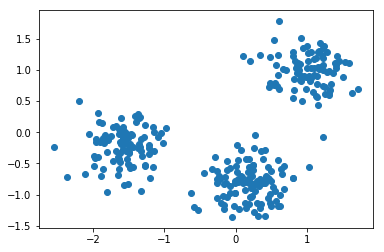

In [54]:
xs = points[:,0]
ys = points[:,1]
plt.scatter(xs, ys)
plt.show();

In [55]:
# Import KMeans
from sklearn.cluster import KMeans

# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters=3)

# Fit model to points
model.fit(points)

# Determine the cluster labels of new_points: labels
labels = model.predict(new_points)

# Print cluster labels of new_points
print(labels)

[2 0 1 2 0 2 0 0 0 1 2 0 0 1 1 0 1 1 0 0 1 0 2 0 2 1 0 1 1 2 2 0 0 0 1 2 0
 0 2 0 1 2 2 1 2 0 1 1 0 0 0 0 1 1 2 2 1 1 1 2 2 0 0 0 2 0 1 0 2 1 2 2 2 0
 2 1 1 2 0 1 2 1 2 0 1 0 1 2 0 0 0 2 0 0 2 1 1 1 1 2 0 2 1 1 2 2 0 2 1 1 2
 1 1 1 0 0 0 0 1 1 0 2 0 1 0 2 1 0 1 1 0 1 0 1 2 0 2 2 0 1 2 0 2 2 1 0 0 2
 1 2 1 0 2 1 1 2 1 0 0 1 0 1 1 0 0 2 0 0 1 2 1 2 2 0 2 0 0 2 2 1 2 2 2 1 0
 0 2 1 2 1 1 0 0 0 2 0 0 0 1 1 2 0 2 2 2 1 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1 1
 0 0 2 1 2 2 1 2 1 2 1 0 0 1 0 0 0 1 2 2 1 0 0 1 0 1 1 0 1 1 2 1 2 2 2 0 1
 1 1 2 0 2 1 2 1 1 0 2 2 2 1 0 0 0 2 0 1 1 0 2 2 1 2 2 1 2 0 2 1 1 1 1 0 1
 1 0 0 2]


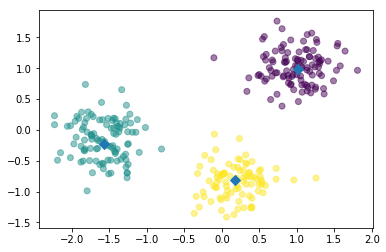

In [56]:
# Assign the columns of new_points: xs and ys
xs = new_points[:,0]
ys = new_points[:,1]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs, ys, c=labels, alpha=0.5)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, marker='D', s=50)
plt.show();

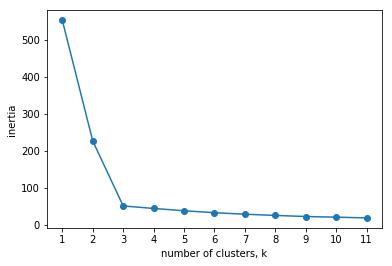

In [58]:
ks = range(1, 12)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(points)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show();

`The rule of thumb is to choose "elbow" in the inertia plot as the optimal number of clusters`.

### Cross-tabulation

In [59]:
varieties = ['Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat']
samples = np.array([[15.26, 14.84, 0.871, 5.763, 3.312, 2.221, 5.22],
 [14.88, 14.57, 0.8811, 5.553999999999999, 3.333, 1.018, 4.956],
 [14.29, 14.09, 0.905, 5.291, 3.3369999999999997, 2.699, 4.825],
 [13.84, 13.94, 0.8955, 5.324, 3.3789999999999996, 2.259, 4.805],
 [16.14, 14.99, 0.9034, 5.6579999999999995, 3.562, 1.355, 5.175],
 [14.38, 14.21, 0.8951, 5.386, 3.312, 2.4619999999999997, 4.956],
 [14.69, 14.49, 0.8799, 5.563, 3.259, 3.5860000000000003, 5.218999999999999],
 [14.11, 14.1, 0.8911, 5.42, 3.302, 2.7, 5.0],
 [16.63, 15.46, 0.8747, 6.053, 3.465, 2.04, 5.877000000000001],
 [16.44, 15.25, 0.888, 5.8839999999999995, 3.505, 1.969, 5.5329999999999995],
 [15.26, 14.85, 0.8696, 5.7139999999999995, 3.242, 4.543, 5.314],
 [14.03, 14.16, 0.8796, 5.438, 3.201, 1.7169999999999999, 5.001],
 [13.89, 14.02, 0.888, 5.439, 3.199, 3.986, 4.738],
 [13.78, 14.06, 0.8759, 5.479, 3.156, 3.136, 4.872],
 [13.74, 14.05, 0.8744, 5.482, 3.114, 2.932, 4.825],
 [14.59, 14.28, 0.8993, 5.351, 3.333, 4.185, 4.781000000000001],
 [13.99, 13.83, 0.9183, 5.119, 3.383, 5.234, 4.781000000000001],
 [15.69, 14.75, 0.9058, 5.527, 3.514, 1.599, 5.046],
 [14.7, 14.21, 0.9153, 5.205, 3.466, 1.767, 4.649],
 [12.72, 13.57, 0.8686, 5.226, 3.049, 4.102, 4.914],
 [14.16, 14.4, 0.8584, 5.6579999999999995, 3.1289999999999996, 3.072, 5.176],
 [14.11, 14.26, 0.8722, 5.52, 3.168, 2.688, 5.218999999999999],
 [15.88, 14.9, 0.8988, 5.617999999999999, 3.5069999999999997, 0.7651, 5.091],
 [12.08, 13.23, 0.8664, 5.099, 2.9360000000000004, 1.415, 4.961],
 [15.01, 14.76, 0.8657, 5.789, 3.245, 1.791, 5.001],
 [16.19, 15.16, 0.8849, 5.832999999999999, 3.4210000000000003, 0.903, 5.307],
 [13.02, 13.76, 0.8641, 5.395, 3.0260000000000002, 3.373, 4.825],
 [12.74, 13.67, 0.8564, 5.395, 2.9560000000000004, 2.504, 4.869],
 [14.11, 14.18, 0.882, 5.541, 3.221, 2.7539999999999996, 5.038],
 [13.45, 14.02, 0.8604, 5.516, 3.065, 3.531, 5.0969999999999995],
 [13.16, 13.82, 0.8662, 5.454, 2.975, 0.8551, 5.056],
 [15.49, 14.94, 0.8724, 5.757000000000001, 3.3710000000000004, 3.412, 5.228],
 [14.09,
  14.41,
  0.8529,
  5.7170000000000005,
  3.1860000000000004,
  3.92,
  5.2989999999999995],
 [13.94, 14.17, 0.8728, 5.585, 3.15, 2.124, 5.012],
 [15.05, 14.68, 0.8779, 5.712000000000001, 3.3280000000000003, 2.129, 5.36],
 [16.12, 15.0, 0.9, 5.709, 3.485, 2.27, 5.443],
 [16.2, 15.27, 0.8734, 5.8260000000000005, 3.464, 2.823, 5.527],
 [17.08,
  15.38,
  0.9079,
  5.832000000000001,
  3.6830000000000003,
  2.9560000000000004,
  5.484],
 [14.8, 14.52, 0.8823, 5.656000000000001, 3.2880000000000003, 3.112, 5.309],
 [14.28, 14.17, 0.8944, 5.397, 3.298, 6.685, 5.001],
 [13.54, 13.85, 0.8871, 5.348, 3.156, 2.5869999999999997, 5.178],
 [13.5, 13.85, 0.8852, 5.351, 3.158, 2.249, 5.176],
 [13.16, 13.55, 0.9009, 5.138, 3.201, 2.461, 4.783],
 [15.5, 14.86, 0.882, 5.877000000000001, 3.3960000000000004, 4.711, 5.528],
 [15.11, 14.54, 0.8986, 5.579, 3.4619999999999997, 3.128, 5.18],
 [13.8, 14.04, 0.8794, 5.376, 3.155, 1.56, 4.961],
 [15.36,
  14.76,
  0.8861,
  5.7010000000000005,
  3.3930000000000002,
  1.367,
  5.132000000000001],
 [14.99, 14.56, 0.8883, 5.57, 3.377, 2.958, 5.175],
 [14.79,
  14.52,
  0.8819,
  5.545,
  3.2910000000000004,
  2.7039999999999997,
  5.111000000000001],
 [14.86, 14.67, 0.8676, 5.678, 3.258, 2.129, 5.351],
 [14.43, 14.4, 0.8751, 5.585, 3.272, 3.975, 5.144],
 [15.78, 14.91, 0.8923, 5.6739999999999995, 3.4339999999999997, 5.593, 5.136],
 [14.49, 14.61, 0.8538, 5.715, 3.113, 4.1160000000000005, 5.396],
 [14.33, 14.28, 0.8831, 5.504, 3.199, 3.3280000000000003, 5.224],
 [14.52, 14.6, 0.8557, 5.7410000000000005, 3.113, 1.4809999999999999, 5.487],
 [15.03, 14.77, 0.8658, 5.702000000000001, 3.2119999999999997, 1.933, 5.439],
 [14.46, 14.35, 0.8818, 5.388, 3.377, 2.802, 5.044],
 [14.92, 14.43, 0.9006, 5.3839999999999995, 3.412, 1.1420000000000001, 5.088],
 [15.38, 14.77, 0.8857, 5.662000000000001, 3.4189999999999996, 1.999, 5.222],
 [12.11, 13.47, 0.8392, 5.159, 3.032, 1.5019999999999998, 4.519],
 [11.42, 12.86, 0.8683, 5.008, 2.85, 2.7, 4.607],
 [11.23, 12.63, 0.884, 4.902, 2.8789999999999996, 2.269, 4.703],
 [12.36, 13.19, 0.8923, 5.0760000000000005, 3.042, 3.22, 4.605],
 [13.22, 13.84, 0.868, 5.395, 3.07, 4.157, 5.088],
 [12.78, 13.57, 0.8716, 5.2620000000000005, 3.0260000000000002, 1.176, 4.782],
 [12.88, 13.5, 0.8879, 5.138999999999999, 3.1189999999999998, 2.352, 4.607],
 [14.34, 14.37, 0.8726, 5.63, 3.19, 1.3130000000000002, 5.15],
 [14.01, 14.29, 0.8625, 5.609, 3.158, 2.217, 5.132000000000001],
 [14.37, 14.39, 0.8726, 5.569, 3.153, 1.464, 5.3],
 [12.73, 13.75, 0.8458, 5.412000000000001, 2.8819999999999997, 3.533, 5.067],
 [17.63, 15.98, 0.8673, 6.191, 3.5610000000000004, 4.0760000000000005, 6.06],
 [16.84, 15.67, 0.8623, 5.997999999999999, 3.484, 4.675, 5.877000000000001],
 [17.26, 15.73, 0.8763, 5.978, 3.594, 4.539, 5.791],
 [19.11, 16.26, 0.9081, 6.154, 3.93, 2.9360000000000004, 6.079],
 [16.82, 15.51, 0.8786, 6.017, 3.486, 4.004, 5.841],
 [16.77, 15.62, 0.8638, 5.9270000000000005, 3.438, 4.92, 5.795],
 [17.32, 15.91, 0.8599, 6.064, 3.403, 3.824, 5.922000000000001],
 [20.71,
  17.23,
  0.8763,
  6.579,
  3.8139999999999996,
  4.4510000000000005,
  6.4510000000000005],
 [18.94, 16.49, 0.875, 6.445, 3.639, 5.064, 6.362],
 [17.12, 15.55, 0.8892, 5.85, 3.5660000000000003, 2.858, 5.746],
 [16.53, 15.34, 0.8823, 5.875, 3.467, 5.532, 5.88],
 [18.72, 16.19, 0.8977, 6.006, 3.8569999999999998, 5.324, 5.879],
 [20.2, 16.89, 0.8894, 6.285, 3.864, 5.172999999999999, 6.187],
 [19.57, 16.74, 0.8779, 6.3839999999999995, 3.772, 1.472, 6.273],
 [19.51, 16.71, 0.878, 6.3660000000000005, 3.801, 2.9619999999999997, 6.185],
 [18.27, 16.09, 0.887, 6.172999999999999, 3.6510000000000002, 2.443, 6.197],
 [18.88, 16.26, 0.8969, 6.084, 3.764, 1.649, 6.109],
 [18.98,
  16.66,
  0.8590000000000001,
  6.5489999999999995,
  3.67,
  3.6910000000000003,
  6.497999999999999],
 [21.18, 17.21, 0.8989, 6.5729999999999995, 4.033, 5.78, 6.231],
 [20.88, 17.05, 0.9031, 6.45, 4.032, 5.016, 6.321000000000001],
 [20.1, 16.99, 0.8746, 6.581, 3.785, 1.955, 6.449],
 [18.76, 16.2, 0.8984, 6.172000000000001, 3.7960000000000003, 3.12, 6.053],
 [18.81, 16.29, 0.8906, 6.272, 3.693, 3.237, 6.053],
 [18.59, 16.05, 0.9066, 6.037000000000001, 3.86, 6.001, 5.877000000000001],
 [18.36, 16.52, 0.8452, 6.666, 3.485, 4.933, 6.4479999999999995],
 [16.87, 15.65, 0.8648, 6.138999999999999, 3.463, 3.696, 5.9670000000000005],
 [19.31, 16.59, 0.8815, 6.341, 3.81, 3.477, 6.2379999999999995],
 [18.98, 16.57, 0.8687, 6.449, 3.552, 2.144, 6.452999999999999],
 [18.17, 16.26, 0.8637, 6.271, 3.512, 2.853, 6.273],
 [18.72,
  16.34,
  0.8809999999999999,
  6.218999999999999,
  3.6839999999999997,
  2.188,
  6.097],
 [16.41, 15.25, 0.8866, 5.718, 3.525, 4.217, 5.617999999999999],
 [17.99, 15.86, 0.8992, 5.89, 3.694, 2.068, 5.837000000000001],
 [19.46, 16.5, 0.8985, 6.1129999999999995, 3.892, 4.308, 6.0089999999999995],
 [19.18, 16.63, 0.8717, 6.369, 3.681, 3.3569999999999998, 6.229],
 [18.95, 16.42, 0.8829, 6.247999999999999, 3.755, 3.3680000000000003, 6.148],
 [18.83, 16.29, 0.8917, 6.037000000000001, 3.786, 2.553, 5.879],
 [18.85, 16.17, 0.9056, 6.152, 3.806, 2.843, 6.2],
 [17.63, 15.86, 0.88, 6.0329999999999995, 3.573, 3.747, 5.928999999999999],
 [19.94, 16.92, 0.8752, 6.675, 3.763, 3.252, 6.55],
 [18.55, 16.22, 0.8865, 6.153, 3.674, 1.7380000000000002, 5.894],
 [18.45, 16.12, 0.8921, 6.107, 3.7689999999999997, 2.235, 5.794],
 [19.38, 16.72, 0.8716, 6.303, 3.7910000000000004, 3.678, 5.965],
 [19.13, 16.31, 0.9035, 6.183, 3.9019999999999997, 2.109, 5.9239999999999995],
 [19.14, 16.61, 0.8722, 6.2589999999999995, 3.737, 6.682, 6.053],
 [20.97, 17.25, 0.8859, 6.563, 3.991, 4.677, 6.316],
 [19.06, 16.45, 0.8854, 6.416, 3.719, 2.248, 6.162999999999999],
 [18.96, 16.2, 0.9077, 6.051, 3.897, 4.334, 5.75],
 [19.15, 16.45, 0.889, 6.245, 3.815, 3.0839999999999996, 6.185],
 [18.89, 16.23, 0.9008, 6.227, 3.7689999999999997, 3.639, 5.966],
 [20.03, 16.9, 0.8811, 6.492999999999999, 3.8569999999999998, 3.063, 6.32],
 [20.24, 16.91, 0.8897, 6.315, 3.9619999999999997, 5.901, 6.188],
 [18.14, 16.12, 0.8772, 6.059, 3.563, 3.6189999999999998, 6.011],
 [16.17,
  15.38,
  0.8588,
  5.7620000000000005,
  3.387,
  4.2860000000000005,
  5.702999999999999],
 [18.43, 15.97, 0.9077, 5.98, 3.7710000000000004, 2.984, 5.905],
 [15.99, 14.89, 0.9064, 5.3629999999999995, 3.582, 3.3360000000000003, 5.144],
 [18.75,
  16.18,
  0.8999,
  6.111000000000001,
  3.8689999999999998,
  4.188,
  5.992000000000001],
 [18.65, 16.41, 0.8698, 6.285, 3.594, 4.391, 6.102],
 [17.98, 15.85, 0.8993, 5.979, 3.687, 2.2569999999999997, 5.919],
 [20.16, 17.03, 0.8735, 6.513, 3.773, 1.91, 6.185],
 [17.55, 15.66, 0.8991, 5.791, 3.69, 5.3660000000000005, 5.6610000000000005],
 [18.3, 15.89, 0.9108, 5.979, 3.755, 2.8369999999999997, 5.962000000000001],
 [18.94, 16.32, 0.8942, 6.144, 3.825, 2.908, 5.949],
 [15.38, 14.9, 0.8706, 5.8839999999999995, 3.2680000000000002, 4.462, 5.795],
 [16.16, 15.33, 0.8644, 5.845, 3.395, 4.266, 5.795],
 [15.56, 14.89, 0.8823, 5.776, 3.408, 4.9719999999999995, 5.847],
 [15.38, 14.66, 0.899, 5.477, 3.465, 3.6, 5.439],
 [17.36, 15.76, 0.8785, 6.145, 3.574, 3.5260000000000002, 5.971],
 [15.57, 15.15, 0.8527, 5.92, 3.2310000000000003, 2.64, 5.879],
 [15.6, 15.11, 0.858, 5.832000000000001, 3.286, 2.725, 5.752000000000001],
 [16.23,
  15.18,
  0.885,
  5.872000000000001,
  3.472,
  3.7689999999999997,
  5.922000000000001],
 [13.07, 13.92, 0.848, 5.472, 2.9939999999999998, 5.303999999999999, 5.395],
 [13.32, 13.94, 0.8613, 5.541, 3.073, 7.035, 5.44],
 [13.34, 13.95, 0.862, 5.388999999999999, 3.074, 5.995, 5.307],
 [12.22, 13.32, 0.8652, 5.224, 2.967, 5.468999999999999, 5.221],
 [11.82, 13.4, 0.8274, 5.314, 2.7769999999999997, 4.471, 5.178],
 [11.21, 13.13, 0.8167, 5.279, 2.687, 6.169, 5.275],
 [11.43, 13.13, 0.8335, 5.176, 2.719, 2.221, 5.132000000000001],
 [12.49, 13.46, 0.8658, 5.267, 2.967, 4.421, 5.002],
 [12.7, 13.71, 0.8491, 5.386, 2.911, 3.26, 5.316],
 [10.79, 12.93, 0.8107, 5.317, 2.648, 5.462000000000001, 5.194],
 [11.83, 13.23, 0.8496, 5.263, 2.84, 5.195, 5.307],
 [12.01, 13.52, 0.8249, 5.405, 2.7760000000000002, 6.992000000000001, 5.27],
 [12.26, 13.6, 0.8333, 5.4079999999999995, 2.833, 4.756, 5.36],
 [11.18, 13.04, 0.8266, 5.22, 2.693, 3.332, 5.001],
 [11.36, 13.05, 0.8382, 5.175, 2.755, 4.048, 5.263],
 [11.19, 13.05, 0.8253, 5.25, 2.675, 5.813, 5.218999999999999],
 [11.34, 12.87, 0.8596, 5.053, 2.8489999999999998, 3.347, 5.003],
 [12.13, 13.73, 0.8081, 5.394, 2.745, 4.825, 5.22],
 [11.75, 13.52, 0.8082, 5.444, 2.678, 4.378, 5.31],
 [11.49, 13.22, 0.8263, 5.303999999999999, 2.695, 5.388, 5.31],
 [12.54,
  13.67,
  0.8425,
  5.4510000000000005,
  2.8789999999999996,
  3.082,
  5.4910000000000005],
 [12.02, 13.33, 0.8503, 5.35, 2.81, 4.271, 5.308],
 [12.05, 13.41, 0.8416, 5.267, 2.847, 4.988, 5.046],
 [12.55, 13.57, 0.8558, 5.332999999999999, 2.968, 4.419, 5.176],
 [11.14, 12.79, 0.8558, 5.011, 2.7939999999999996, 6.388, 5.0489999999999995],
 [12.1, 13.15, 0.8793, 5.105, 2.9410000000000003, 2.201, 5.056],
 [12.44, 13.59, 0.8462, 5.319, 2.897, 4.9239999999999995, 5.27],
 [12.15,
  13.45,
  0.8443,
  5.417000000000001,
  2.8369999999999997,
  3.638,
  5.337999999999999],
 [11.35, 13.12, 0.8291, 5.176, 2.668, 4.337, 5.132000000000001],
 [11.24, 13.0, 0.8359, 5.09, 2.715, 3.5210000000000004, 5.088],
 [11.02, 13.0, 0.8189, 5.325, 2.701, 6.735, 5.162999999999999],
 [11.55, 13.1, 0.8455, 5.167000000000001, 2.845, 6.715, 4.956],
 [11.27, 12.97, 0.8419, 5.088, 2.763, 4.309, 5.0],
 [11.4, 13.08, 0.8375, 5.136, 2.763, 5.587999999999999, 5.0889999999999995],
 [10.83, 12.96, 0.8099, 5.278, 2.641, 5.182, 5.185],
 [10.8, 12.57, 0.8590000000000001, 4.981, 2.821, 4.773, 5.063],
 [11.26, 13.01, 0.8355, 5.186, 2.71, 5.335, 5.092],
 [10.74, 12.73, 0.8329, 5.145, 2.642, 4.702, 4.963],
 [11.48, 13.05, 0.8473, 5.18, 2.758, 5.876, 5.002],
 [12.21, 13.47, 0.8453, 5.357, 2.8930000000000002, 1.661, 5.178],
 [11.41, 12.95, 0.856, 5.09, 2.775, 4.957, 4.825],
 [12.46, 13.41, 0.8706, 5.236000000000001, 3.017, 4.987, 5.147],
 [12.19, 13.36, 0.8579, 5.24, 2.909, 4.857, 5.1579999999999995],
 [11.65, 13.07, 0.8575, 5.1080000000000005, 2.85, 5.209, 5.135],
 [12.89, 13.77, 0.8541, 5.495, 3.0260000000000002, 6.185, 5.316],
 [11.56, 13.31, 0.8198, 5.3629999999999995, 2.6830000000000003, 4.062, 5.182],
 [11.81, 13.45, 0.8198, 5.412999999999999, 2.716, 4.898, 5.352],
 [10.91, 12.8, 0.8372, 5.088, 2.675, 4.178999999999999, 4.956],
 [11.23, 12.82, 0.8594, 5.0889999999999995, 2.821, 7.524, 4.957],
 [10.59, 12.41, 0.8648, 4.899, 2.787, 4.975, 4.794],
 [10.93, 12.8, 0.8390000000000001, 5.046, 2.717, 5.398, 5.045],
 [11.27, 12.86, 0.8563, 5.091, 2.804, 3.985, 5.001],
 [11.87,
  13.02,
  0.8795,
  5.132000000000001,
  2.9530000000000003,
  3.597,
  5.132000000000001],
 [10.82, 12.83, 0.8256, 5.18, 2.63, 4.853, 5.0889999999999995],
 [12.11, 13.27, 0.8639, 5.236000000000001, 2.975, 4.132, 5.012],
 [12.8, 13.47, 0.8859999999999999, 5.16, 3.1260000000000003, 4.873, 4.914],
 [12.79, 13.53, 0.8786, 5.224, 3.054, 5.483, 4.958],
 [13.37, 13.78, 0.8849, 5.32, 3.128, 4.67, 5.091],
 [12.62, 13.67, 0.8481, 5.41, 2.911, 3.306, 5.231],
 [12.76, 13.38, 0.8964, 5.073, 3.155, 2.8280000000000003, 4.83],
 [12.38, 13.44, 0.8609, 5.218999999999999, 2.989, 5.472, 5.045],
 [12.67, 13.32, 0.8977, 4.984, 3.135, 2.3, 4.745],
 [11.18, 12.72, 0.868, 5.0089999999999995, 2.81, 4.051, 4.828],
 [12.7, 13.41, 0.8874, 5.183, 3.091, 8.456, 5.0],
 [12.37, 13.47, 0.8567, 5.204, 2.96, 3.9189999999999996, 5.001],
 [12.19,
  13.2,
  0.8783,
  5.1370000000000005,
  2.9810000000000003,
  3.6310000000000002,
  4.87],
 [11.23, 12.88, 0.8511, 5.14, 2.795, 4.325, 5.003],
 [13.2, 13.66, 0.8883, 5.236000000000001, 3.2319999999999998, 8.315, 5.056],
 [11.84, 13.21, 0.8521, 5.175, 2.8360000000000003, 3.5980000000000003, 5.044],
 [12.3,
  13.34,
  0.8684,
  5.242999999999999,
  2.9739999999999998,
  5.6370000000000005,
  5.063]])

In [60]:
samples[0:10]

array([[15.26  , 14.84  ,  0.871 ,  5.763 ,  3.312 ,  2.221 ,  5.22  ],
       [14.88  , 14.57  ,  0.8811,  5.554 ,  3.333 ,  1.018 ,  4.956 ],
       [14.29  , 14.09  ,  0.905 ,  5.291 ,  3.337 ,  2.699 ,  4.825 ],
       [13.84  , 13.94  ,  0.8955,  5.324 ,  3.379 ,  2.259 ,  4.805 ],
       [16.14  , 14.99  ,  0.9034,  5.658 ,  3.562 ,  1.355 ,  5.175 ],
       [14.38  , 14.21  ,  0.8951,  5.386 ,  3.312 ,  2.462 ,  4.956 ],
       [14.69  , 14.49  ,  0.8799,  5.563 ,  3.259 ,  3.586 ,  5.219 ],
       [14.11  , 14.1   ,  0.8911,  5.42  ,  3.302 ,  2.7   ,  5.    ],
       [16.63  , 15.46  ,  0.8747,  6.053 ,  3.465 ,  2.04  ,  5.877 ],
       [16.44  , 15.25  ,  0.888 ,  5.884 ,  3.505 ,  1.969 ,  5.533 ]])

In [61]:
varieties[:10]

['Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat']

In [62]:
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)

# Use fit_predict to fit model and obtain cluster labels: labels
# Using .fit_predict() is the same as using .fit() followed by .predict().
labels = model.fit_predict(samples)
labels[:10]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [63]:
# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})
df.head()

,labels,varieties
0,2,Kama wheat
1,2,Kama wheat
2,2,Kama wheat
3,2,Kama wheat
4,2,Kama wheat


In [64]:
# Create crosstab: ct to count the number of times each grain variety coincides with each cluster label
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
ct

varieties,Canadian wheat,Kama wheat,Rosa wheat
labels,,,
0,68,9,0
1,0,1,60
2,2,60,10


The cross-tabulation shows that the 3 varieties of grain separate really well into 3 clusters. But depending on the type of data you are working with, the clustering may not always be this good.

## Resources

- [Model Fit Metrics](https://www.kaggle.com/residentmario/model-fit-metrics/)
- [np.newaxis](https://medium.com/@ian.dzindo01/what-is-numpy-newaxis-and-when-to-use-it-8cb61c7ed6ae)
- [Two visualizations for explaining “variance explained"](https://assessingpsyche.wordpress.com/2014/07/10/two-visualizations-for-explaining-variance-explained/)